In [1]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

**STATIONARY BANDIT**

In [6]:
# Bandit params
no_bandits = 100
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
ucb_params = (False, 0.5)

# Training params
iter_per_run = 1000
epsilon = 0.1

In [7]:
for i in range(no_bandits):
    bandits.append(ka.KarmedStationary(arms, means, sigmas, init_estim_vals, ucb_params))
    bandits[i].setTrainParams(iter_per_run, epsilon)

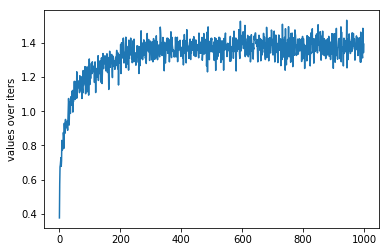

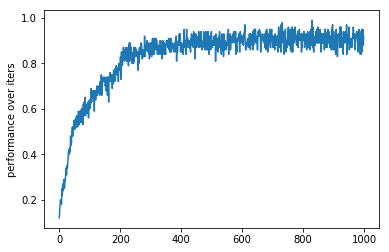

In [8]:
all_agents_iter_values = []
all_agents_iter_idxs = []
for b in range(no_bandits):
    iter_values, calculated_rewards, iter_idxs = bandits[b].run()
    all_agents_iter_values.append(iter_values)
    all_agents_iter_idxs.append(iter_idxs)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

performance = np.zeros(iter_per_run)
all_agents_iter_idxs = np.array(all_agents_iter_idxs)
for i in range(iter_per_run):
    matching_idxs = np.isin(all_agents_iter_idxs[:, i], 1)
    performance[i] = len(all_agents_iter_idxs[:, i][matching_idxs])/no_bandits
    
plt.plot(performance)
plt.ylabel('performance over iters')
plt.show()

**NON-STATIONARY BANDIT**

In [5]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
alpha = 0.2
normal_noise_mu = 0
normal_noise_sigma = 0.01

# Training params
iter_per_run = 1000
epsilon = 0.01

In [16]:
for i in range(no_bandits):
    bandits.append(ka.KarmedNonStationary(arms, means, sigmas, init_estim_vals, alpha))
    bandits[i].setTrainParams(iter_per_run, epsilon)
    bandits[i].setRandomNoise(normal_noise_mu, normal_noise_sigma)

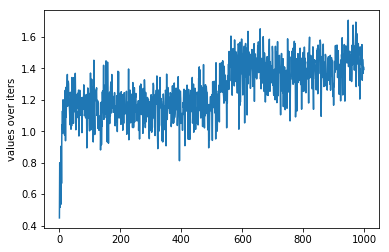

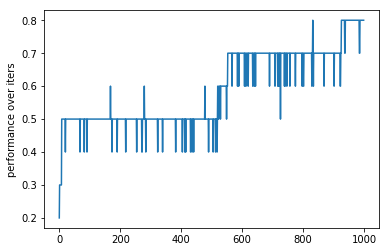

mu: -0.1603153388840368   sigma: 0.3
mu: 1.3695588712120235   sigma: 0.3
mu: 0.647694684653795   sigma: 0.3
mu: -0.41787387798751924   sigma: 0.3
mu: -0.10529097409806827   sigma: 0.3
mu: 0.888238662617702   sigma: 0.3
mu: 1.23427618246746   sigma: 0.3
mu: 0.006264199936927319   sigma: 0.3
mu: -0.11917705528457175   sigma: 0.3
mu: 1.5294257015227193   sigma: 0.3


In [17]:
all_agents_iter_values = []
all_agents_iter_idxs = []
for b in range(no_bandits):
    iter_values, calculated_rewards, leverages, iter_idxs = bandits[b].run()
    all_agents_iter_values.append(iter_values)
    all_agents_iter_idxs.append(iter_idxs)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

performance = np.zeros(iter_per_run)
all_agents_iter_idxs = np.array(all_agents_iter_idxs)
for i in range(iter_per_run):
    matching_idxs = np.isin(all_agents_iter_idxs[:, i], 1)
    performance[i] = len(all_agents_iter_idxs[:, i][matching_idxs])/no_bandits
    
plt.plot(performance)
plt.ylabel('performance over iters')
plt.show()

for lev in leverages:
    print('mu: ' + str(lev.getMu()) + '   sigma: ' + str(lev.getSigma()))

**UPPER-CONFIDENCE-BOUND ACTION SELECTION**

In [45]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
ucb_params = (True, 0.5)

# Training params
iter_per_run = 1000
epsilon = 0.1

In [22]:
for i in range(no_bandits):
    bandits.append(ka.KarmedStationary(arms, means, sigmas, init_estim_vals, ucb_params))
    bandits[i].setTrainParams(iter_per_run, epsilon)

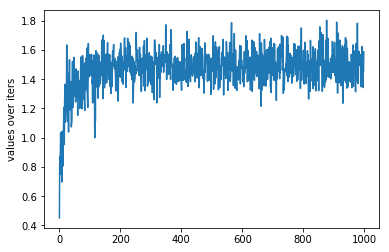

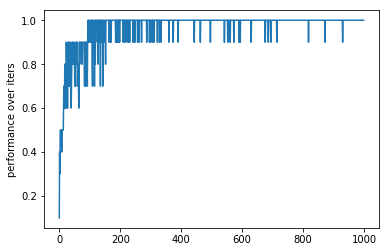

In [23]:
all_agents_iter_values = []
all_agents_iter_idxs = []
for b in range(no_bandits):
    iter_values, calculated_rewards, iter_idxs = bandits[b].run()
    all_agents_iter_values.append(iter_values)
    all_agents_iter_idxs.append(iter_idxs)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

performance = np.zeros(iter_per_run)
all_agents_iter_idxs = np.array(all_agents_iter_idxs)
for i in range(iter_per_run):
    matching_idxs = np.isin(all_agents_iter_idxs[:, i], 1)
    performance[i] = len(all_agents_iter_idxs[:, i][matching_idxs])/no_bandits
    
plt.plot(performance)
plt.ylabel('performance over iters')
plt.show()

**STATIONARY GRADIENT-ASCENT BANDIT**

In [1]:
import Leverage as lv
import Karmed as ka
import matplotlib.pyplot as plt
import numpy as np
from math import exp

In [2]:
# Bandit params
no_bandits = 10
bandits = []
arms = 10
means = [0, 1.5, 0.2, -0.5, -0.1, 0.8, 0.65, 0.15, -0.3, 0.95]
sigmas = [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]
init_estim_vals = 0
alpha = 0.2
stationarity = 'non_stat'

# Training params
iter_per_run = 1000
epsilon = 0.01

In [3]:
for i in range(no_bandits):
    bandits.append(ka.KarmedGradient(arms, means, sigmas, init_estim_vals, alpha, stationarity))
    bandits[i].setTrainParams(iter_per_run, epsilon)
    bandits[i].setRandomNoise(0, 0.01)

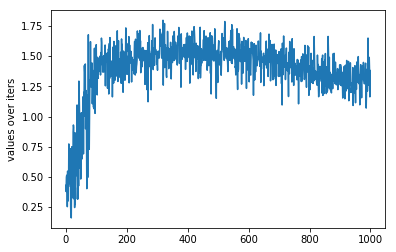

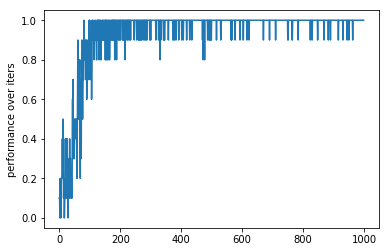

mu: -0.142780292106931   sigma: 0.3
mu: 1.1494396655486003   sigma: 0.3
mu: 0.46029840804013816   sigma: 0.3
mu: -0.012570376243455566   sigma: 0.3
mu: -0.09456253279619675   sigma: 0.3
mu: 0.9326653996322832   sigma: 0.3
mu: 0.009764806099686104   sigma: 0.3
mu: 0.5996685151861562   sigma: 0.3
mu: -0.5465185467166099   sigma: 0.3
mu: 0.4925536345029104   sigma: 0.3


In [4]:
all_agents_iter_values = []
all_agents_iter_idxs = []
for b in range(no_bandits):
    iter_values, calculated_rewards, leverages, iter_idxs = bandits[b].run()
    all_agents_iter_values.append(iter_values)
    all_agents_iter_idxs.append(iter_idxs)

all_agents_iter_values = np.mean(all_agents_iter_values, axis=0)
plt.plot(all_agents_iter_values)
plt.ylabel('values over iters')
plt.show()

performance = np.zeros(iter_per_run)
all_agents_iter_idxs = np.array(all_agents_iter_idxs)
for i in range(iter_per_run):
    matching_idxs = np.isin(all_agents_iter_idxs[:, i], 1)
    performance[i] = len(all_agents_iter_idxs[:, i][matching_idxs])/no_bandits
    
plt.plot(performance)
plt.ylabel('performance over iters')
plt.show()

for lev in leverages:
    print('mu: ' + str(lev.getMu()) + '   sigma: ' + str(lev.getSigma()))